Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x.sort()
x

array([ 35,  40,  45,  54,  70, 110, 120, 150, 190, 200])

In [34]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y.sort()
y

array([401, 459, 574, 653, 739, 746, 832, 874, 902, 919])

In [35]:
n = 10

In [36]:
b = (n*(np.sum(x*y)) - (np.sum(x)*np.sum(y)))/(n*(np.sum(x**2))-((np.sum(x)*2)))
b

0.6801121230096421

In [37]:
a = np.mean(y) - b * np.mean(x)
a

640.9366307268223

In [41]:
y_hat = 640.94 + 0.68*x
y_hat

array([664.74, 668.14, 671.54, 677.66, 688.54, 715.74, 722.54, 742.94,
       770.14, 776.94])

In [42]:
y

array([401, 459, 574, 653, 739, 746, 832, 874, 902, 919])

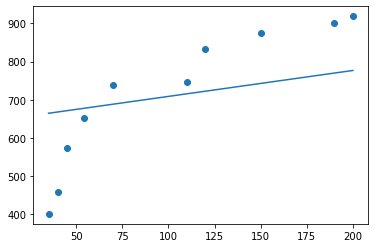

In [45]:
%matplotlib inline
plt.scatter(x, y)
plt.plot(x, 640.94 + 0.68*x)
plt.show()

In [46]:
mse = ((y-y_hat)**2).sum()/n
mse

19360.8692

### матричный

In [47]:
import seaborn as sns

In [48]:
x1 = x.reshape((10, 1))
x1

array([[ 35],
       [ 40],
       [ 45],
       [ 54],
       [ 70],
       [110],
       [120],
       [150],
       [190],
       [200]])

In [49]:
y1 = y.reshape((10, 1))
y1

array([[401],
       [459],
       [574],
       [653],
       [739],
       [746],
       [832],
       [874],
       [902],
       [919]])

In [50]:
x1 = np.hstack([np.ones((10, 1)), x1])
x1

array([[  1.,  35.],
       [  1.,  40.],
       [  1.,  45.],
       [  1.,  54.],
       [  1.,  70.],
       [  1., 110.],
       [  1., 120.],
       [  1., 150.],
       [  1., 190.],
       [  1., 200.]])

In [53]:
b1 = np.dot(np.linalg.inv(np.dot(x1.T, x1)), x1.T@y1)
b1

array([[438.43221619],
       [  2.67719708]])

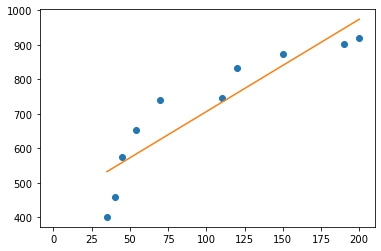

In [56]:
%matplotlib inline
plt.scatter(x, y)
plt.plot(x1, 438.43 + 2.68*x1)
plt.show()

### 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [74]:
def mse_(B1, y=y, x=x, n=10):
    return np.sum((B1*x-y)**2)/n

In [75]:
alpha = 1e-6

In [76]:
B1= 0.1

In [77]:
n = 10

In [78]:
for i in range (100):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%10 == 0:
        print('Iter: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1= B1, mse=mse_(B1)))

Iter: 0, B1 = 0.25992408, mse = 493073.36098132876
Iter: 10, B1 = 1.6357820792995132, mse = 305182.045037559
Iter: 20, B1 = 2.6762582267245882, mse = 197727.75997826335
Iter: 30, B1 = 3.4631058620995345, mse = 136275.08815249425
Iter: 40, B1 = 4.058149970344916, mse = 101130.55322360103
Iter: 50, B1 = 4.50814495646293, mse = 81031.53557844367
Iter: 60, B1 = 4.848448279738332, mse = 69536.98852816437
Iter: 70, B1 = 5.105798595641437, mse = 62963.30347431203
Iter: 80, B1 = 5.300416692396926, mse = 59203.83953038995
Iter: 90, B1 = 5.447594299122657, mse = 57053.81727805101


In [79]:
for i in range (10000):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%1000 == 0:
        print('Iter: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1= B1, mse=mse_(B1)))

Iter: 0, B1 = 5.5588956029717425, mse = 55824.22823171214
Iter: 1000, B1 = 5.904192616465349, mse = 54181.64383447295
Iter: 2000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 3000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 4000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 5000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 6000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 7000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 8000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 9000, B1 = 5.904192616465585, mse = 54181.64383447295


In [81]:
for i in range (5000):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%1000 == 0:
        print('Iter: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1= B1, mse=mse_(B1)))

Iter: 0, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 1000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 2000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 3000, B1 = 5.904192616465585, mse = 54181.64383447295
Iter: 4000, B1 = 5.904192616465585, mse = 54181.64383447295


In [84]:
mse_(5.90419261)

54181.64383447295

с интерсептом

In [96]:
def  cal_ks(a3,x,y):
    n = 10
    
    predictions = x.dot(a)
    a = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [97]:
def gradient_descent(x,y,a3,learning_rate=0.01,iterations=100):
    m = 10
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(x,a3)
        
        a3 = a3 -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        a_history[it,:] =a3.T
        ks_history[it]  = cal_ks(a3,x,y)
        
    return a3, ks_history,  a_history

In [98]:
lr =0.01
n_iter = 1000

a3 = np.random.randn(2,1)

x_b = np.c_[np.ones((len(x),1)),x]
a3, ks_history, a_history = gradient_descent(x_b,y,a3,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(a3[0][0],a3[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(ks_history[-1]))

NameError: name 'a_history' is not defined